# Problems:

### Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/GenderedVoice/voice.csv")

data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


For question 1, ultimately we're gonna look at R squareds. But first let's visualize the data

In [43]:
X = data.drop(columns = ['label'])
Y = data['label']

#normalize the feature data by centering and dividing by standard deviation
#to see how crucial this is for making sense of the data, comment out the line below and see how the plots below change

X = (X - X.mean())/X.std()

X.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03
mean,1.343797e-15,1.513240e-15,9.425681e-16,-3.610958e-15,-2.819595e-14,7.174396e-16,-7.311772e-16,-5.639253e-16,2.494932e-14,-4.150230e-15,-8.958182e-16,1.343797e-15,-2.425038e-15,-4.596211e-15,-2.861484e-14,-3.041829e-15,3.688197e-15,-2.761540e-16,2.312965e-17,7.983232e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.731066e+00,-2.327777e+00,-4.803229e+00,-2.880601e+00,-7.691381e+00,-1.630357e+00,-7.070892e-01,-2.556907e-01,-3.478836e+00,-2.091807e+00,-2.140872e+00,-4.731066e+00,-2.700601e+00,-1.406176e+00,-5.178304e+00,-1.563958e+00,-7.545755e-01,-1.431196e+00,-1.418913e+00,-1.454543e+00
25%,-5.763944e-01,-9.111334e-01,-4.408165e-01,-6.033124e-01,-6.776157e-01,-9.758452e-01,-3.515125e-01,-2.290019e-01,-7.406945e-01,-8.459608e-01,-6.122303e-01,-5.763944e-01,-7.989074e-01,-9.666296e-01,-1.620488e-01,-7.794727e-01,-7.082925e-01,-8.454507e-01,-8.379759e-01,-6.193636e-01
50%,1.314199e-01,1.218547e-01,1.213335e-01,-3.475208e-03,3.888670e-02,2.330498e-01,-2.223937e-01,-2.093699e-01,1.476175e-01,-6.692869e-02,2.761141e-01,1.314199e-01,-7.083289e-02,4.842729e-01,4.104155e-01,-1.207455e-01,-4.614500e-01,-1.564521e-02,-1.401041e-02,-2.879298e-01
75%,6.096510e-01,5.941816e-01,6.874959e-01,7.289110e-01,7.993273e-01,6.980735e-01,-4.916214e-02,-1.698642e-01,7.467041e-01,7.067315e-01,7.230590e-01,6.096510e-01,8.287991e-01,5.776489e-01,6.188852e-01,6.625126e-01,2.790774e-01,5.567874e-01,5.674817e-01,2.966132e-01
max,2.346999e+00,3.491858e+00,2.079304e+00,2.195809e+00,2.060318e+00,3.924821e+00,7.448431e+00,9.434944e+00,1.931313e+00,2.448833e+00,1.485929e+00,2.346999e+00,2.935500e+00,8.703446e+00,6.739858e-01,4.052648e+00,6.419284e+00,4.776814e+00,4.786629e+00,6.350730e+00


male      1584
female    1584
Name: label, dtype: int64

C:\Users\burch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

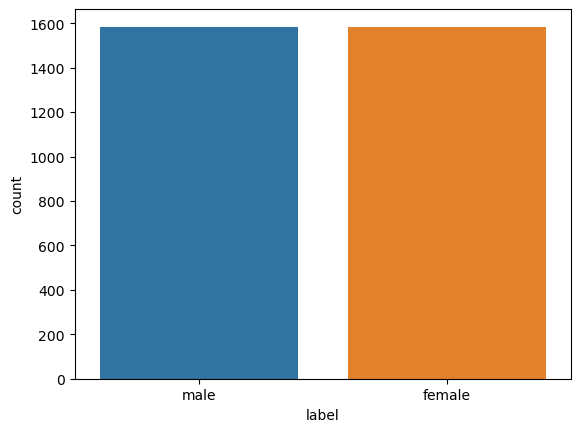

In [27]:
display(Y.value_counts())
sns.countplot(Y)

Text(0.5, 1.0, 'Correlations')

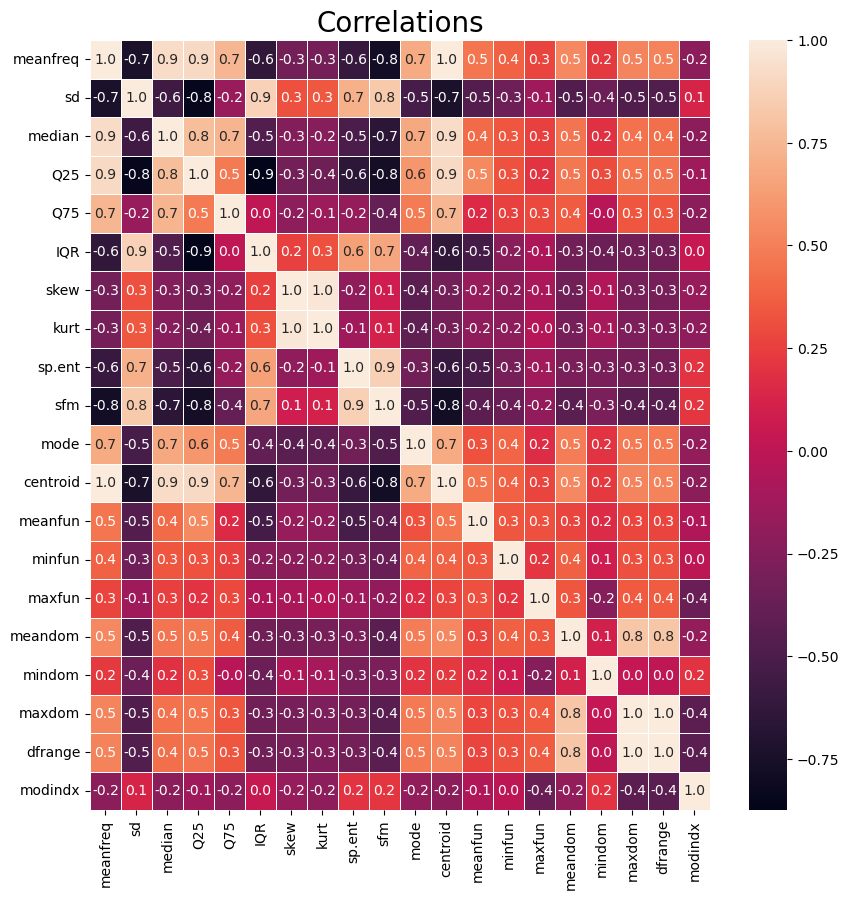

In [28]:
f, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(X.corr(), annot = True, linewidth = 0.5, fmt = '.1f')

ax.set_title('Correlations', fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

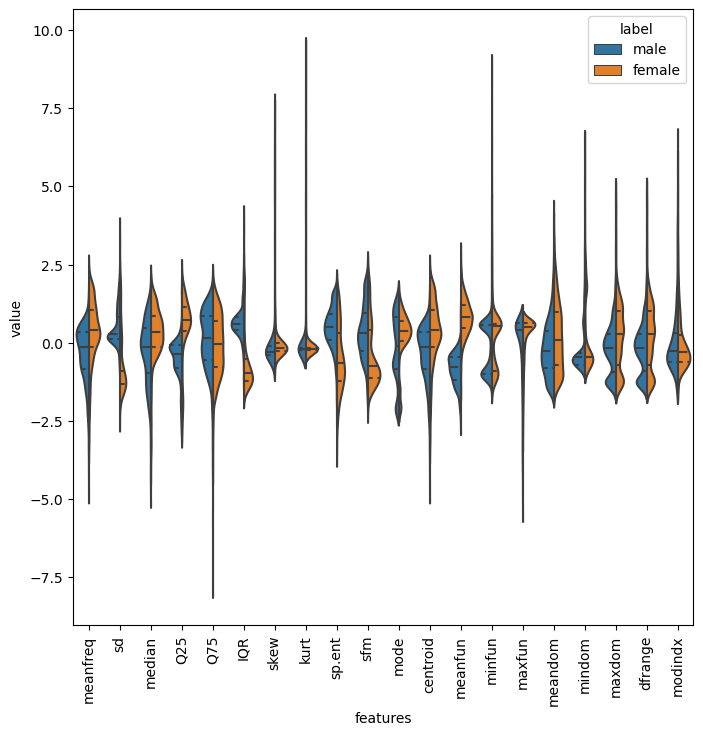

In [44]:
#violin plots

plt.figure(figsize=(8,8))

vio = pd.concat([Y, X],axis=1)
vio = pd.melt(vio,id_vars="label",
                    var_name="features",
                    value_name='value')

sns.violinplot(x="features", y="value", hue="label", data=vio,split=True, inner="quart")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

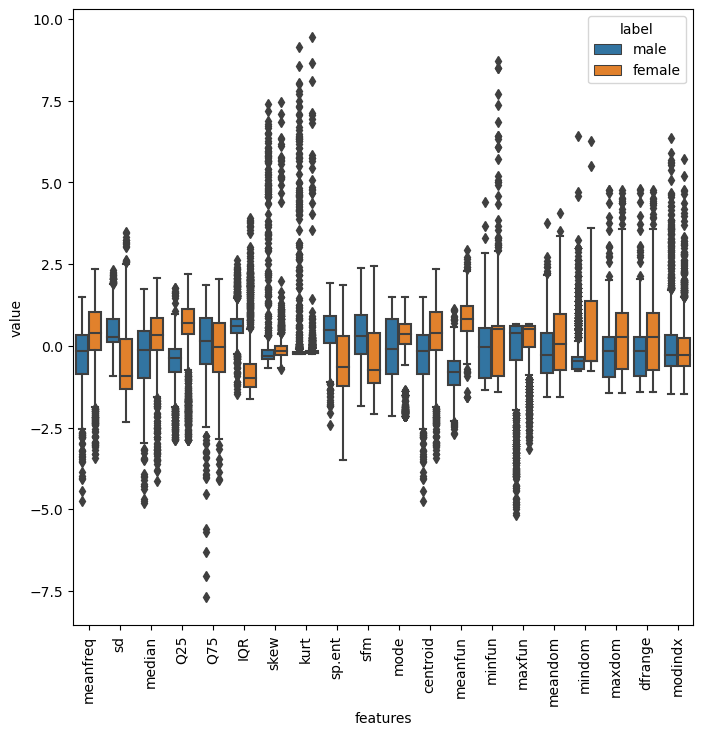

In [45]:
#box plot

plt.figure(figsize=(8,8))

sns.boxplot(x="features", y="value", hue="label", data=vio)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

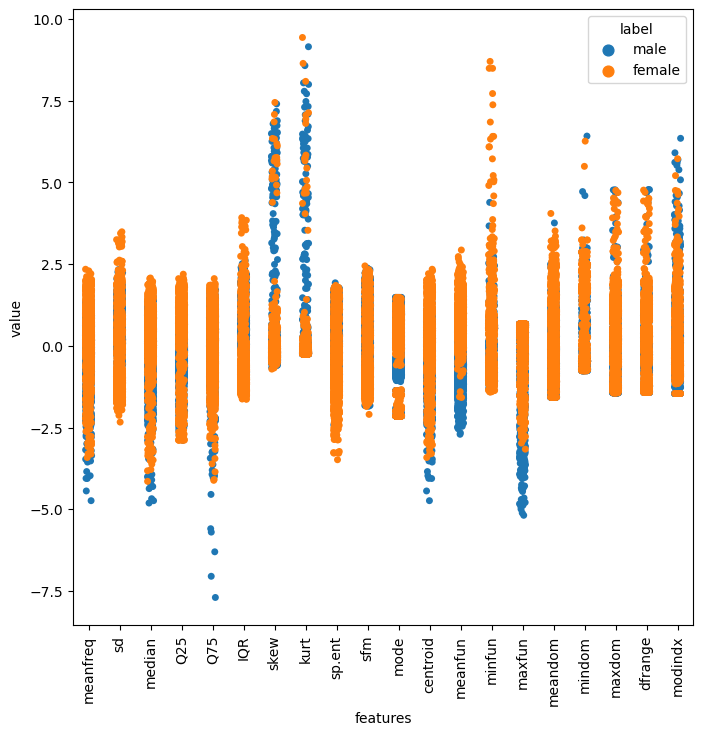

In [46]:
#stripplot

plt.figure(figsize=(8,8))

sns.stripplot(x="features", y="value", hue="label", data=vio)

plt.xticks(rotation=90)

Thus, mean frequency, spectral entropy, mean fundamental frequency, and mean of dominant frequency seem to be our best predictors of the voice's gender.

Let's make this more precise by performing a variety of regressions against our feature variables.

In [47]:
train_size = 2534

train=data.sample(n=train_size, replace=False, random_state=100)
test=data.drop(train.index)

print("Train Shape", train.shape)
print("Test Shape", test.shape)

X_train = train.drop(columns = ['label'])
Y_train = train['label']

X_test = test.drop(columns = ['label'])
Y_test = test['label']

display(X_train)

Train Shape (2534, 21)
Test Shape (634, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
322,0.154434,0.061416,0.166399,0.098671,0.202102,0.103431,3.019968,12.758842,0.897214,0.459831,0.099536,0.154434,0.094673,0.014205,0.103093,0.524774,0.205078,0.708008,0.502930,0.306149
1221,0.198480,0.063197,0.199937,0.137125,0.258325,0.121201,2.464330,10.059033,0.861033,0.275471,0.256556,0.198480,0.132247,0.049485,0.266667,1.444973,0.140625,12.023438,11.882812,0.095332
1498,0.161514,0.074179,0.182566,0.102510,0.226109,0.123598,1.318529,4.686746,0.962416,0.726932,0.098605,0.161514,0.113916,0.049689,0.275862,0.642663,0.046875,4.312500,4.265625,0.186896
1745,0.187125,0.031593,0.185277,0.170122,0.199296,0.029175,2.221711,7.246410,0.840933,0.212158,0.170501,0.187125,0.178872,0.081633,0.231884,0.191840,0.164062,0.234375,0.070312,0.104575
2388,0.213095,0.037241,0.217306,0.199241,0.232713,0.033472,2.168188,7.224561,0.843428,0.256797,0.227932,0.213095,0.160391,0.047291,0.277457,1.227764,0.210938,7.757812,7.546875,0.125086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.216473,0.058323,0.226168,0.200374,0.258692,0.058318,1.695745,5.338922,0.892106,0.361473,0.208224,0.216473,0.173048,0.048387,0.275862,1.330078,0.023438,5.718750,5.695312,0.169113
812,0.175609,0.054744,0.183706,0.135559,0.211753,0.076194,1.703629,6.538832,0.914107,0.422329,0.182304,0.175609,0.111494,0.047105,0.272727,1.034255,0.023438,7.617188,7.593750,0.105593
2696,0.206145,0.047248,0.202015,0.166756,0.249304,0.082548,1.003340,3.170930,0.894288,0.248490,0.151822,0.206145,0.161494,0.047856,0.279070,2.065370,0.023438,10.125000,10.101562,0.152275
2353,0.236703,0.035746,0.247347,0.224490,0.258776,0.034286,2.767103,10.975624,0.823211,0.182902,0.248571,0.236703,0.185297,0.047059,0.279070,1.931350,0.023438,11.273438,11.250000,0.115891


In [48]:
Y_trainDum = pd.get_dummies(Y_train)
Y_testDum = pd.get_dummies(Y_test)

In [77]:
Y_train01 = []

for string in Y_train:
    if string == 'male':
        Y_train01.append(1) 
    else:
        Y_train01.append(0)
        
Y_test01 = []

for string in Y_test:
    if string == 'male':
        Y_test01.append(1) 
    else:
        Y_test01.append(0)

In [117]:
lr = LinearRegression()
lin_r_squareds = []
coeffs = []

for feature in X_train.keys():
    arrTrain = X_train[feature].values.reshape(-1, 1) #scikit-learn expects a 2d array for the feature data
    lr.fit(arrTrain, Y_train01) 
    arrTest = X_test[feature].values.reshape(-1, 1)
    lin_r_squareds.append(lr.score(arrTest, Y_test01))
    coeffs.append([lr.coef_,lr.intercept_])

In [124]:
best = lin_r_squareds.index(max(lin_r_squareds))

print('The best R squared was', max(lin_r_squareds))
print('The best predictor of gendered voice was', X_train.keys()[best])

The best R squared was 0.7074224208719953
The best predictor of gendered voice was meanfun


After inspection, maxdom was the second best predictor.

In [123]:
lr.fit(X_train[['meanfun', 'maxdom']], Y_train01)
lr.score(X_test[['meanfun', 'maxdom']], Y_test01)

0.7086618842908361

This is a mild improvement

In [125]:
B0 = lr.intercept_
B = lr.coef_

print("The Linear Coefficients:\n", B)
print("The Intercept:", B0)

The Linear Coefficients:
 [-1.30273292e+01  5.66811203e-03]
The Intercept: 2.3333998456006886


Now let's fit to all of the features

In [138]:
lr.fit(X_train, pd.get_dummies(Y_train))
lr.score(X_test, pd.get_dummies(Y_test))

0.8032066170838701

Thus we see a substantial improvement when fitting to all of the features.

Moving on to quadratic discriminant analysis:

In [128]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance = True)

quad_r_squareds = []
quad_coeffs = []

for feature in X_train.keys():
    arrTrain = X_train[feature].values.reshape(-1, 1) #scikit-learn expects a 2d array for the feature data
    qda.fit(arrTrain, Y_train01) 
    arrTest = X_test[feature].values.reshape(-1, 1)
    quad_r_squareds.append(qda.score(arrTest, Y_test01))

In [131]:
#significant improvements
print(quad_r_squareds)
print('The best R squared was', max(quad_r_squareds))
best = quad_r_squareds.index(max(quad_r_squareds))
print('The best predictor of gendered voice was', X_train.keys()[12])

[0.6182965299684543, 0.8028391167192429, 0.6182965299684543, 0.8470031545741324, 0.5520504731861199, 0.8817034700315457, 0.5283911671924291, 0.5378548895899053, 0.750788643533123, 0.6782334384858044, 0.6514195583596214, 0.6182965299684543, 0.9637223974763407, 0.5362776025236593, 0.5504731861198738, 0.5694006309148265, 0.5141955835962145, 0.583596214511041, 0.5851735015772871, 0.5189274447949527]
The best R squared was 0.9637223974763407
The best predictor of gendered voice was meanfun


Once again, mean fundamental frequency is the best predictor. Interquartile range was second best.

In [136]:
qda.fit(X_train[['meanfun', 'IQR']], Y_train01)
print(qda.score(X_test[['meanfun', 'IQR']], Y_test01))

#a mild improvement

0.9684542586750788


In [140]:
qda.fit(X_train, Y_train01)
print(qda.score(X_test, Y_test01))

0.7523659305993691


C:\Users\burch\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


So in QDA, is better to not fit to all the features.

In conclusion, the best fit overall was obtained in QDA fitting to the features meanfun and IQR.

Moving on to graphing our models. For linear regression we will look at two pairs of features:
maxdom and meanfun, and IQR and meanfun

In [149]:
#retrieving the beta values

lr = LinearRegression()
lr.fit(X_train[['maxdom', 'meanfun']],pd.get_dummies(Y_train))
print(lr.score(X_test[['maxdom', 'meanfun']], pd.get_dummies(Y_test)))

B0 = lr.intercept_
B = lr.coef_
print(B0)
print(B)

0.7086618842908361
[-1.33339985  2.33339985]
[[-5.66811203e-03  1.30273292e+01]
 [ 5.66811203e-03 -1.30273292e+01]]


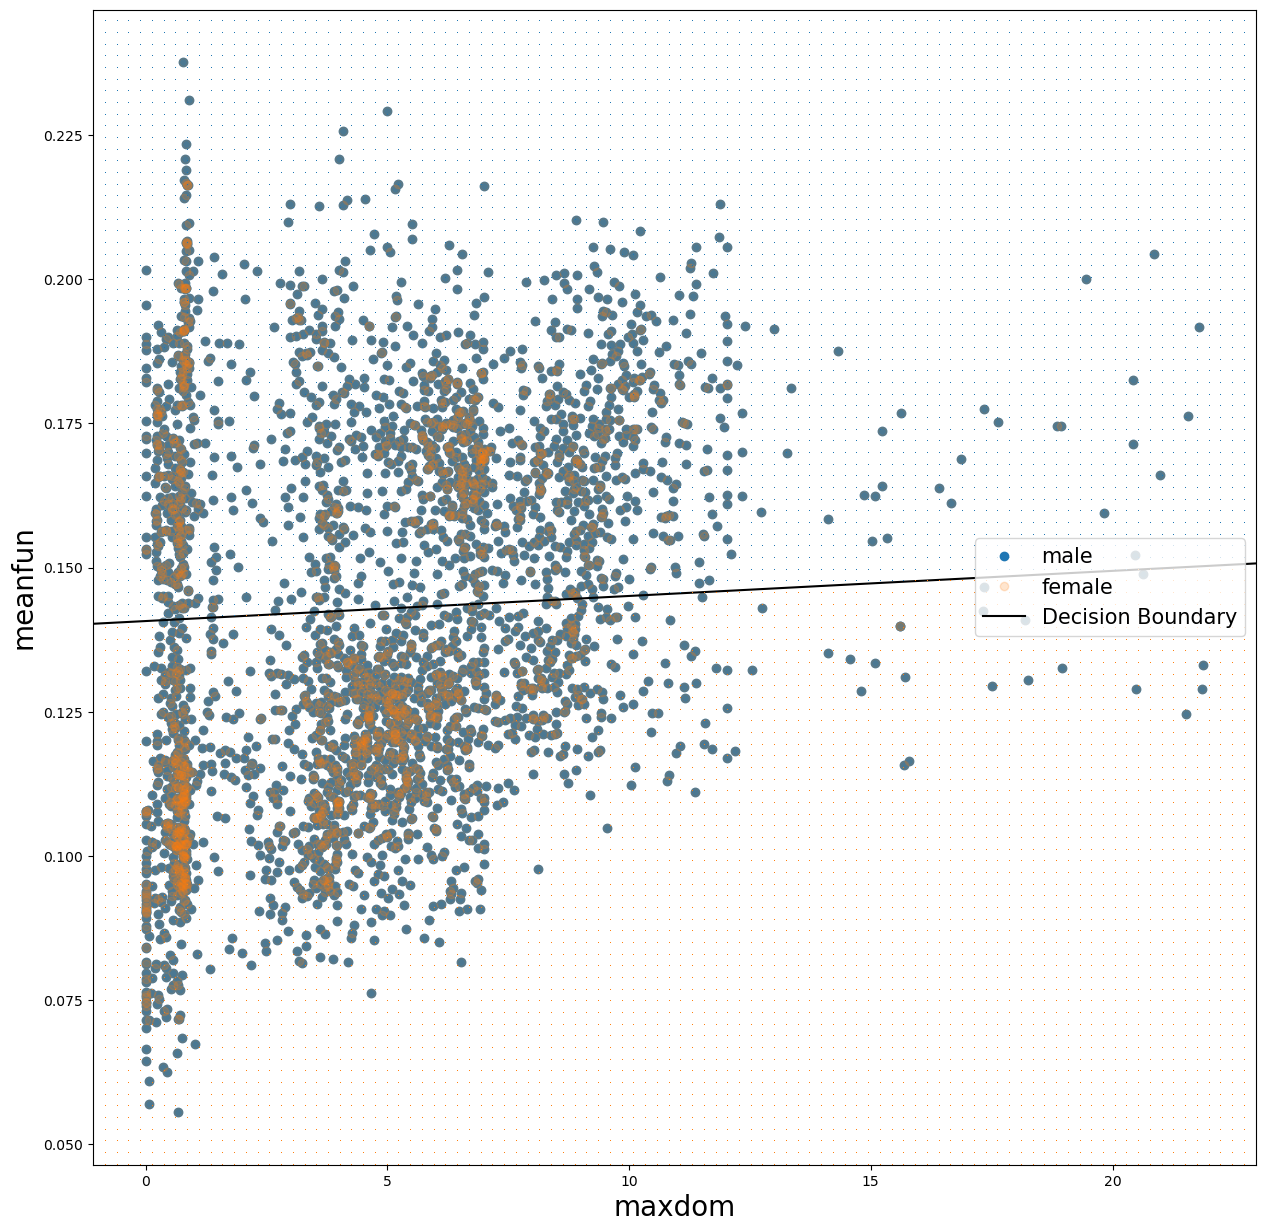

In [150]:
#Construct a meshgrid for the scatterplot of maxdom and meanfun

f, ax = plt.subplots(figsize=(8,8))
f.set_size_inches(15,15)

## We set alpha=.2 to try to avoid masking, but some points still will be buried. 
plt.plot(data['maxdom'], data['meanfun'],'o',label="male")
plt.plot(data['maxdom'], data['meanfun'],'o',label="female",alpha=.2)


xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

plt.xlabel('maxdom',fontsize=20)
plt.ylabel('meanfun',fontsize=20)
plt.legend(fontsize=15)

Now look at IQR and meanfun:

In [147]:
#retrieving the beta values

lr = LinearRegression()
lr.fit(X_train[['IQR', 'meanfun']],pd.get_dummies(Y_train))
print(lr.score(X_test[['IQR', 'meanfun']], pd.get_dummies(Y_test)))

B0 = lr.intercept_
B = lr.coef_
print(B0)
print(B)

0.7368872235177211
[-0.77215614  1.77215614]
[[ -2.9950872   10.66155125]
 [  2.9950872  -10.66155125]]


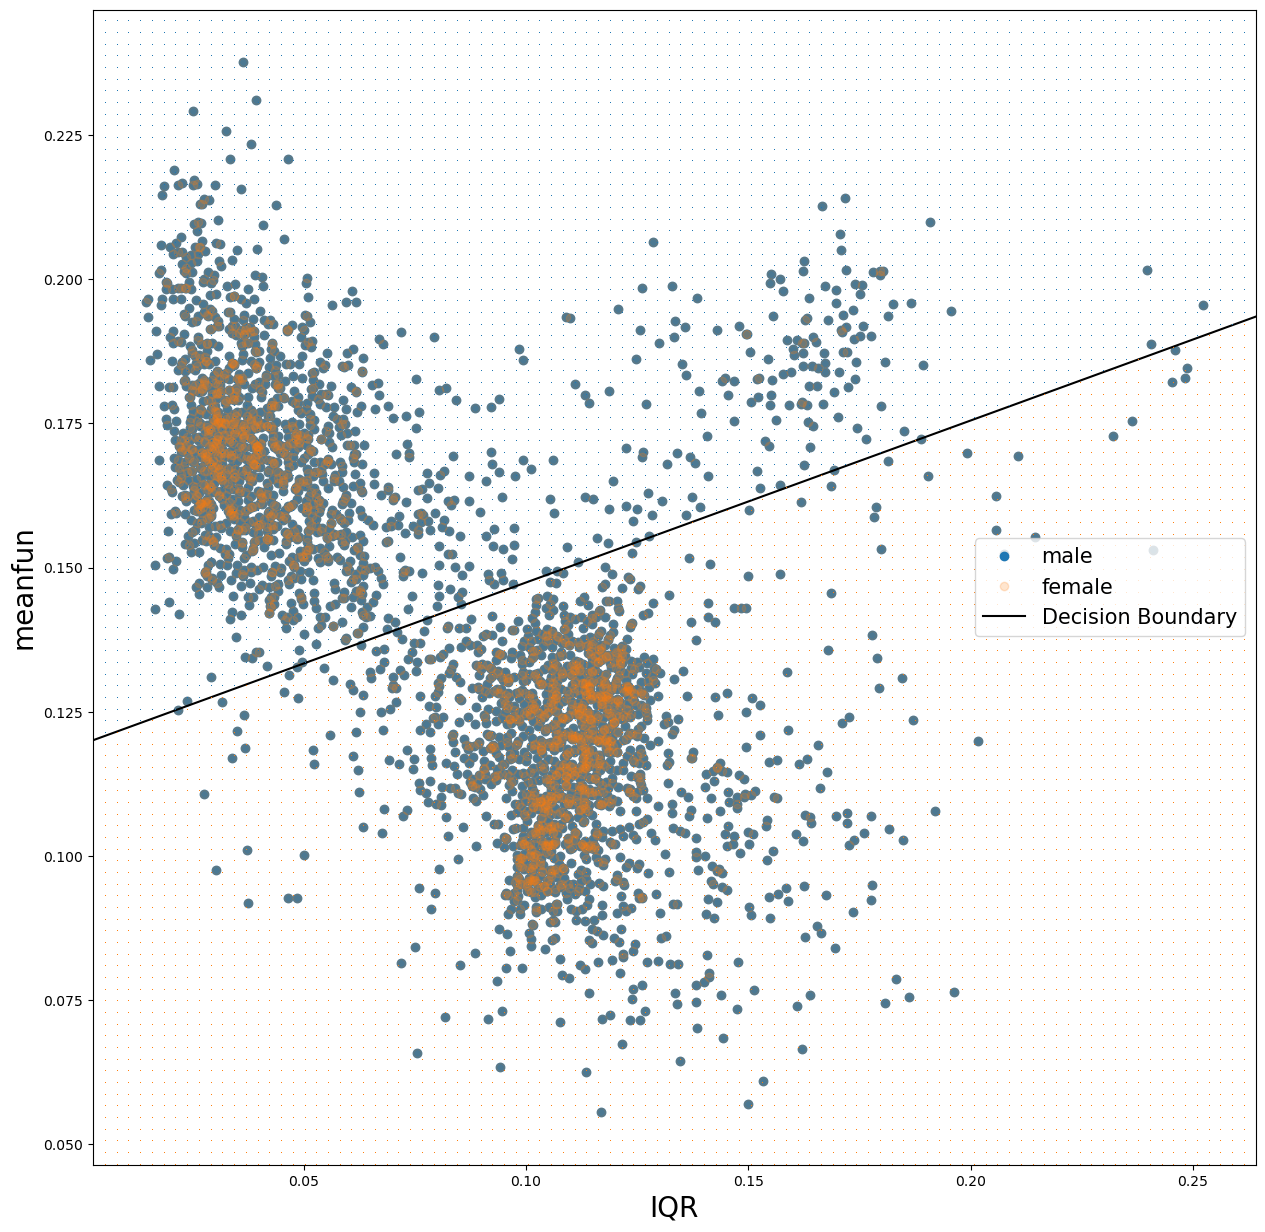

In [148]:
#Construct a meshgrid for the scatterplot of IQR and meanfun

f, ax = plt.subplots(figsize=(8,8))
f.set_size_inches(15,15)

## We set alpha=.2 to try to avoid masking, but some points still will be buried. 
plt.plot(data['IQR'], data['meanfun'],'o',label="male")
plt.plot(data['IQR'], data['meanfun'],'o',label="female",alpha=.2)


xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

plt.xlabel('IQR',fontsize=20)
plt.ylabel('meanfun',fontsize=20)
plt.legend(fontsize=15)

Notice how the points above fall roughly into 2 clusters, with a smaller cluster of male voices in the upper right

This might be why QDA did so much better than linear regression. 

Some kind of conic equation would be able to segregate the two main clusters from the smaller cluster.

## Problem 2: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'C:/Users/burch/OneDrive/Documents/MRI_Slices/'
#file_dir = 'C:/Users/Admin/Downloads/Student Data/MRILargeSlices/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Filename
0,0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png
1,1,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_86.png
2,2,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_128.png
3,3,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_44.png
4,4,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_86.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_86.png
698,698,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_128.png
699,699,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_44.png
700,700,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_86.png


In [154]:
data = np.zeros([702, 36608])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(561,) (141,)


We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example, 

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 36608/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [155]:
DS = 8             # Downsample rate, must be a factor of 36608

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

if 36608/DS % 1 > 0:
    print("Downsample rate is not a multiple of 36608")
    DS = 1
    im_size = 36608
else:
    im_size = int(36608/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS])
   
for n in range(N_train):
    for i in range(DS):
        Xds_train[n*DS+i,:] = X_train[n,i::DS]
        yds_train[n*DS+i] = y_train[n]

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

qda = LinearDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, (2*yds_train).astype("int"))
print("Score: %.3f"%qda.score(Xds_train,(2*yds_train).astype("int")))

Score: 1.000


In [157]:
(2*yds_train).astype("int")

array([0, 0, 0, ..., 2, 2, 2])

### Question 1:

Based on the code above, downsample the test data in the same way. 

In [160]:
y_test = np.array(y_test)

Xds_test = np.zeros([141*DS, im_size])
yds_test = np.zeros([141*DS])

for n in range(141):
    for i in range(DS):
        Xds_test[n*DS+i,:] = X_test[n,i::DS]
        yds_test[n*DS+i] = y_test[n]

print(Xds_test.shape)
print(yds_test.shape)

(1128, 4576)
(1128,)


### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?

In [161]:
#Convert target variables to correct data type.
yds_train =(2*yds_train).astype("int")
yds_test =(2*yds_test).astype("int")

In [162]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

qda = LinearDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, yds_train)

print("Score: %.3f"%qda.score(Xds_test,yds_test))

Score: 0.320


In [163]:
#quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, yds_train)
print("Score: %.3f"%qda.score(Xds_test,yds_test))

C:\Users\burch\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Score: 0.212


In [164]:
#logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xds_train,yds_train)

print("Score: %.3f"%clf.score(Xds_test,yds_test))

Score: 0.527


C:\Users\burch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
#categorical regression

y_train_dummies = pd.get_dummies(yds_train) #treating the target data as categoricals
y_test_dummies = pd.get_dummies(yds_test)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xds_train,y_train_dummies)

print("The r^2 score on the training data is %.3f"%(lr.score(Xds_test, y_test_dummies),))

The r^2 score on the training data is -48.736


Note that these R-squared values aren't wildly impressive. However, in a previous lab in this course (see Lab 2 in my repository) we performed a variety of regressions (linear, lasso, ridge) and received even worse scores for R-squared. 

In the previous lab, the target variable (CDR in the dataframe, representing state of dementia) was treated as a numeric. By treating the 4 possible states instead as categoricals, we get significant improvments in our regressions.